<a href="https://colab.research.google.com/github/monicadesai/Project---Effort-9---Concept-Understanding-9/blob/master/Project2_in_Deep_Learning_Music_Genre_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
# Aim: Given audio files for songs, identify which genre they fall in.

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install path

In [ ]:
#Downloading Data
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

--2020-08-14 13:27:44--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2020-08-14 13:27:45--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc67453e4d9833d68bddf42f69b.dl.dropboxusercontent.com/cd/0/inline/A9d77R9JxO7VOswL-JNRFbX2MMy1ii1UYXWYIC7zzoVj_Az4CJTxcc6fUrBY0Exly2uTCkU3vg437BEiu5Da6j8xQgiJr9gKFclqTwK6Jmr8oQ/file# [following]
--2020-08-14 13:27:45--  https://ucc67453e4d9833d68bddf42f69b.dl.dropboxusercontent.com/cd/0/inline/A9d77R9JxO7VOswL-JNRFbX2MMy1ii1UYXWYIC7zzoVj_Az4CJTxcc6fUrBY0Exly2uTCkU3vg437BEiu5Da6j8xQgiJr9gKFclqTwK6Jmr8oQ/file
Resolvin

In [ ]:
import tarfile

In [ ]:
my_tar = tarfile.open("genres.tar.gz?dl=0")
my_tar.extractall('./fold1') # specify which folder to extract to
my_tar.close()

In [ ]:
!rm genres.tar.gz?dl=0

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc

In [ ]:
import os
os.mkdir('train')
os.mkdir('test')

In [ ]:
from glob import glob

In [ ]:
(glob('./train/*'))

[]

In [ ]:
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = '/content/train/' + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [ ]:
file_dir=list(glob("./fold1/genres/*"))
file_dir

['./fold1/genres/jazz',
 './fold1/genres/pop',
 './fold1/genres/reggae',
 './fold1/genres/classical',
 './fold1/genres/disco',
 './fold1/genres/blues',
 './fold1/genres/rock',
 './fold1/genres/hiphop',
 './fold1/genres/metal',
 './fold1/genres/country']

In [ ]:
file_list=sorted(list(glob("./fold1/genres/*/*")))
file_list[0]

'./fold1/genres/blues/blues.00000.au'

In [ ]:
#/content/genres/blues/blues.00000.au
file_list[1].split('/')[-1]

'blues.00001.au'

In [ ]:
for i,file in enumerate(file_list):
    print(i,end=' ')
    filename,name = file,file.split('/')[-1]
    create_spectrogram(filename,name)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 27

In [ ]:
file_names=[x.split('/')[-1] for x in file_list]
file_names

['blues.00000.au',
 'blues.00001.au',
 'blues.00002.au',
 'blues.00003.au',
 'blues.00004.au',
 'blues.00005.au',
 'blues.00006.au',
 'blues.00007.au',
 'blues.00008.au',
 'blues.00009.au',
 'blues.00010.au',
 'blues.00011.au',
 'blues.00012.au',
 'blues.00013.au',
 'blues.00014.au',
 'blues.00015.au',
 'blues.00016.au',
 'blues.00017.au',
 'blues.00018.au',
 'blues.00019.au',
 'blues.00020.au',
 'blues.00021.au',
 'blues.00022.au',
 'blues.00023.au',
 'blues.00024.au',
 'blues.00025.au',
 'blues.00026.au',
 'blues.00027.au',
 'blues.00028.au',
 'blues.00029.au',
 'blues.00030.au',
 'blues.00031.au',
 'blues.00032.au',
 'blues.00033.au',
 'blues.00034.au',
 'blues.00035.au',
 'blues.00036.au',
 'blues.00037.au',
 'blues.00038.au',
 'blues.00039.au',
 'blues.00040.au',
 'blues.00041.au',
 'blues.00042.au',
 'blues.00043.au',
 'blues.00044.au',
 'blues.00045.au',
 'blues.00046.au',
 'blues.00047.au',
 'blues.00048.au',
 'blues.00049.au',
 'blues.00050.au',
 'blues.00051.au',
 'blues.0005

In [ ]:
df = pd.DataFrame({'Filename': file_names})

In [ ]:
df.head()

,Filename
0,blues.00000.au
1,blues.00001.au
2,blues.00002.au
3,blues.00003.au
4,blues.00004.au


In [ ]:
df['Labels'] = [x.split('.')[0] for x in df.Filename]

In [ ]:
df.Labels.value_counts()

blues        100
metal        100
jazz         100
hiphop       100
disco        100
reggae       100
pop          100
classical    100
rock         100
country      100
Name: Labels, dtype: int64

In [ ]:
classes=list(df['Labels'].value_counts().index)
print(len(classes))
classes

10


['blues',
 'metal',
 'jazz',
 'hiphop',
 'disco',
 'reggae',
 'pop',
 'classical',
 'rock',
 'country']

In [ ]:
for cl in classes:
  os.mkdir('/content/train/'+cl)

In [ ]:
for cl in classes:
  os.mkdir('/content/test/'+cl)

In [ ]:
class_dict_map={x:'/content/train/'+x+'/' for x in classes}
class_dict_map

{'blues': '/content/train/blues/',
 'classical': '/content/train/classical/',
 'country': '/content/train/country/',
 'disco': '/content/train/disco/',
 'hiphop': '/content/train/hiphop/',
 'jazz': '/content/train/jazz/',
 'metal': '/content/train/metal/',
 'pop': '/content/train/pop/',
 'reggae': '/content/train/reggae/',
 'rock': '/content/train/rock/'}

In [ ]:
class_dict_map1={x:'/content/test/'+x+'/' for x in classes}
class_dict_map1

{'blues': '/content/test/blues/',
 'classical': '/content/test/classical/',
 'country': '/content/test/country/',
 'disco': '/content/test/disco/',
 'hiphop': '/content/test/hiphop/',
 'jazz': '/content/test/jazz/',
 'metal': '/content/test/metal/',
 'pop': '/content/test/pop/',
 'reggae': '/content/test/reggae/',
 'rock': '/content/test/rock/'}

In [ ]:
import shutil

In [ ]:
def return_class(file_name):
  cl=df['Labels'][df['Filename']==file_name]
  return(cl.values[0])

In [ ]:
for file in file_names:
  name=file.split('.')[-3]+'.'+file.split('.')[-2]+'.'+file.split('.')[-1]+'.jpg'
  if int(file.split('.')[-2])<75:
    shutil.move('/content/train/'+name,class_dict_map[return_class(file)]+name)
  else:
    shutil.move('/content/train/'+name,class_dict_map1[return_class(file)]+name)

In [ ]:
train_set=[]
train_labels=[]
for i in range(df.shape[0]):
  if (int(df['Filename'][i].split('.')[-2])<75)==True:
    train_set.append(df['Filename'][i])
    train_labels.append(df['Labels'][i])

In [ ]:
len(train_set), len(train_labels)

(750, 750)

In [ ]:
train_dataset = pd.DataFrame({'Filename':train_set, 'Labels':train_labels})

In [ ]:
print(train_dataset.shape)
train_dataset.tail()

(750, 2)


,Filename,Labels
745,rock.00070.au,rock
746,rock.00071.au,rock
747,rock.00072.au,rock
748,rock.00073.au,rock
749,rock.00074.au,rock


In [ ]:
test_dataset = df[~df['Filename'].isin(train_dataset['Filename'])].dropna()

In [ ]:
print(test_dataset.shape)
test_dataset.tail()

(250, 2)


,Filename,Labels
995,rock.00095.au,rock
996,rock.00096.au,rock
997,rock.00097.au,rock
998,rock.00098.au,rock
999,rock.00099.au,rock


In [ ]:
test_dataset.reset_index(drop=True, inplace=True)

In [ ]:
new_classes = list(train_dataset.Labels.unique())

In [ ]:
# You can use ImageDataGenerator Approach from here onward if want.

In [ ]:
#
from keras.preprocessing import image
from tqdm import tqdm

train_image = []
for i, classs in tqdm(enumerate(train_dataset['Labels'])):
    img = image.load_img('/content/train/'+classs+'/'+train_dataset['Filename'][i]+'.jpg', target_size=(64,64,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

750it [00:01, 611.19it/s]


In [ ]:
from keras.preprocessing import image
from tqdm import tqdm

test_image = []
for i, classs in tqdm(enumerate(test_dataset['Labels'])):
    img = image.load_img('/content/test/'+classs+'/'+test_dataset['Filename'][i]+'.jpg', target_size=(64,64,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

250it [00:00, 619.79it/s]


In [ ]:
X[75].shape, test[0].shape

((64, 64, 3), (64, 64, 3))

In [ ]:
from keras.utils import to_categorical

le=LabelEncoder()

train_dataset.Labels = le.fit_transform(train_dataset.Labels)
y = train_dataset['Labels'].values
y = to_categorical(y)

test_dataset.Labels = le.fit_transform(test_dataset.Labels)
y1 = test_dataset['Labels'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import regularizers, optimizers


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0

In [ ]:
y_train.shape

(600, 10)

In [ ]:
import tensorflow
h = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_test,y_test),
          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=90),
                     tensorflow.keras.callbacks.ModelCheckpoint('/content/sample_data/modelmusic_{val_accuracy:.4f}.h5')]
)

Epoch 1/100
19/19 [==============================] - 20s 1s/step - loss: 5.7422 - accuracy: 0.1783 - val_loss: 2.3513 - val_accuracy: 0.1600
Epoch 2/100
19/19 [==============================] - 19s 975ms/step - loss: 2.5763 - accuracy: 0.3017 - val_loss: 2.5169 - val_accuracy: 0.0600
Epoch 3/100
19/19 [==============================] - 19s 979ms/step - loss: 2.2091 - accuracy: 0.3100 - val_loss: 2.9271 - val_accuracy: 0.0600
Epoch 4/100
19/19 [==============================] - 19s 977ms/step - loss: 2.0237 - accuracy: 0.3483 - val_loss: 3.4802 - val_accuracy: 0.0600
Epoch 5/100
19/19 [==============================] - 18s 973ms/step - loss: 1.8322 - accuracy: 0.3917 - val_loss: 4.1819 - val_accuracy: 0.0600
Epoch 6/100
19/19 [==============================] - 19s 974ms/step - loss: 1.7322 - accuracy: 0.4300 - val_loss: 4.7639 - val_accuracy: 0.1200
Epoch 7/100
19/19 [==============================] - 18s 970ms/step - loss: 1.6490 - accuracy: 0.4467 - val_loss: 5.6600 - val_accuracy: 0.

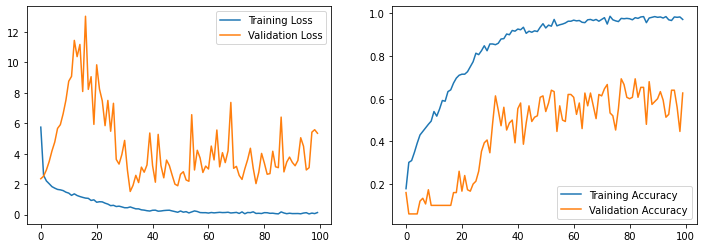

In [ ]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/sample_data/modelmusic_0.6933.h5')

In [ ]:
prediction = model.predict_classes(X_test)

In [ ]:
predictions = list(prediction)

In [ ]:
index = tf.math.argmax(y_test, axis=1)
c = tf.keras.backend.eval(index)
c

array([6, 4, 1, 3, 3, 9, 4, 2, 7, 9, 1, 4, 3, 9, 2, 3, 0, 3, 4, 7, 6, 6,
       5, 4, 0, 9, 3, 4, 2, 2, 4, 6, 6, 4, 4, 1, 2, 5, 1, 5, 1, 9, 0, 1,
       9, 7, 7, 6, 5, 5, 0, 6, 4, 4, 6, 1, 7, 1, 6, 0, 3, 2, 9, 9, 3, 3,
       3, 0, 5, 8, 5, 5, 3, 8, 9, 5, 6, 0, 2, 4, 3, 0, 8, 7, 0, 4, 9, 6,
       8, 0, 7, 0, 8, 9, 1, 4, 6, 3, 1, 2, 1, 9, 0, 9, 2, 0, 8, 9, 5, 2,
       8, 6, 2, 7, 5, 8, 8, 4, 9, 1, 5, 1, 8, 4, 8, 2, 0, 7, 3, 8, 3, 0,
       2, 4, 6, 4, 2, 4, 0, 9, 5, 2, 8, 5, 1, 6, 1, 5, 9, 0])

In [ ]:
#Number of per-labels in y_test and predicitions
d=list(c)
for i in range(10):
  print('Count of',[i], 'in test data is:','     ',d.count(i))
  print('Count of',[i], 'in prediction data is:',predictions.count(i))

Count of [0] in test data is:       17
Count of [0] in prediction data is: 18
Count of [1] in test data is:       15
Count of [1] in prediction data is: 16
Count of [2] in test data is:       15
Count of [2] in prediction data is: 14
Count of [3] in test data is:       15
Count of [3] in prediction data is: 12
Count of [4] in test data is:       19
Count of [4] in prediction data is: 22
Count of [5] in test data is:       15
Count of [5] in prediction data is: 16
Count of [6] in test data is:       15
Count of [6] in prediction data is: 15
Count of [7] in test data is:       9
Count of [7] in prediction data is: 10
Count of [8] in test data is:       13
Count of [8] in prediction data is: 20
Count of [9] in test data is:       17
Count of [9] in prediction data is: 7


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(confusion_matrix(c, prediction))
print(classification_report(c, prediction))
print(accuracy_score(c, prediction))

[[14  0  0  0  1  1  0  0  1  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0  9  2  0  1  0  0  1  2]
 [ 0  0  0  7  2  0  0  3  2  1]
 [ 1  0  0  1 13  0  0  0  4  0]
 [ 0  1  1  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  1  0  1  0  0  6  1  0]
 [ 0  0  1  1  2  0  0  1  8  0]
 [ 3  0  2  1  3  1  0  0  3  4]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.94      1.00      0.97        15
           2       0.64      0.60      0.62        15
           3       0.58      0.47      0.52        15
           4       0.59      0.68      0.63        19
           5       0.81      0.87      0.84        15
           6       1.00      1.00      1.00        15
           7       0.60      0.67      0.63         9
           8       0.40      0.62      0.48        13
           9       0.57      0.24      0.33        17

    accuracy                           0.69       150
   macro avg       